In [1]:
!pip install seaborn 
!pip install sklearn
!pip install statsmodels

In [0]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [0]:
paths = 'http://bigdata.cs.byu.edu/Lectures/EEGEyeState.csv'
df = pd.read_table(paths,sep=',',encoding='latin1')

# Exploratory Data Analysis

In [3]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df.shape

(14980, 15)

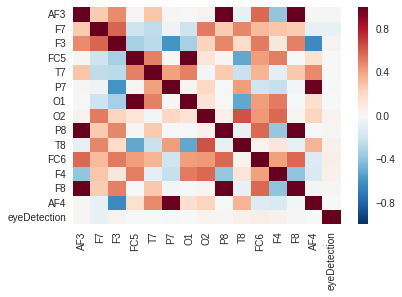

In [5]:
sns.heatmap(df.corr())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3             14980 non-null float64
F7              14980 non-null float64
F3              14980 non-null float64
FC5             14980 non-null float64
T7              14980 non-null float64
P7              14980 non-null float64
O1              14980 non-null float64
O2              14980 non-null float64
P8              14980 non-null float64
T8              14980 non-null float64
FC6             14980 non-null float64
F4              14980 non-null float64
F8              14980 non-null float64
AF4             14980 non-null float64
eyeDetection    14980 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [11]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [13]:
#find null values if any. Data looks clean.
df.isnull().values.any()

False

# Summary

## Background

The EEG (Electroencephalogram) monitors brain wave activity to sense abnormalities such as brain disease, lesions, and other electrical activity occurring in the brain (ie. trauma, body movement, drug intoxication, brain damage). This test is administered by attaching electrodes with wires onto the scalp, detecting tiny electrical charges emitted to brain cells.

## Data and Task

This analysis of the EEG Eye State file consists of data that describes attributes of the EEG test corresponding to whether the eye is detected as opened or closed. From the initial exploratory data analysis, EEG attributes were described to all have similar means and quartiles with varying degrees of variance (34 ~ 5800). Eye detection followed a binomial distribution with 44% detection. 

Several classification models were evaluated to determine optimum results: Neural Networks, Logistic Regression, Random Forest, and K-Nearest Neighbors. These models were chosen out of experiment and out of a desire to learn in Python. The initial assumption surmised the neural networks to have the best classification performance as it has a large number of free parameters (allowing for deeper complexity) and its ability to learn these parameters. However, after careful consideration of the data, interpretation, accuracy, sensitivity/specificity, out of bag error, and area under the curve metrics, it was decided that random forest would be the best classifier.
